In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier


In [3]:
# read the dataset
trainingdata = pd.read_csv('./dataset/banknote.csv')


labels = trainingdata.columns.values
# get the labels from the data


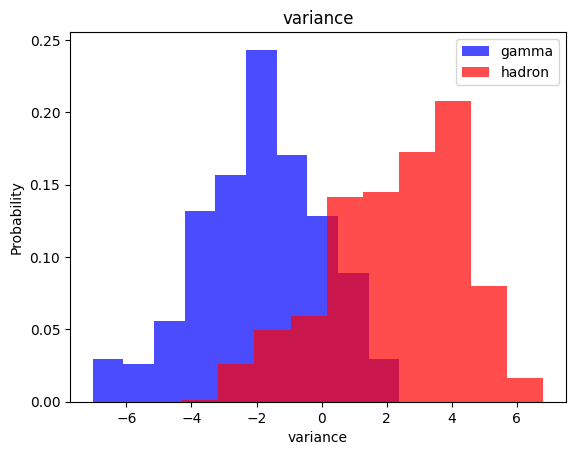

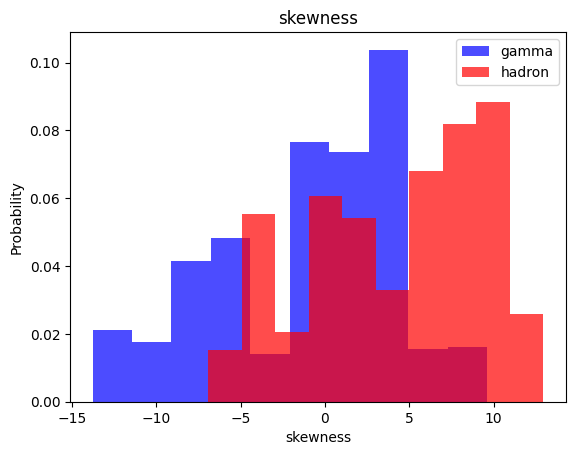

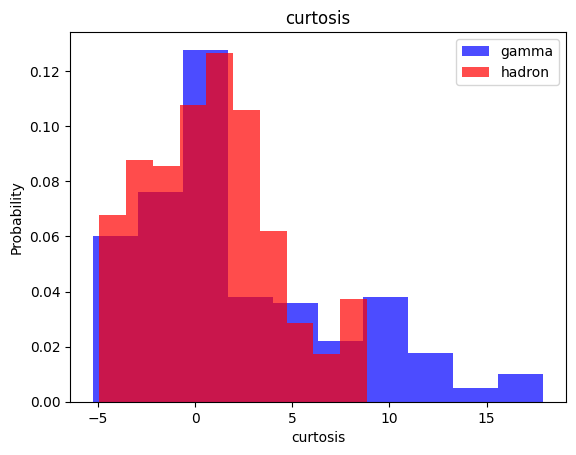

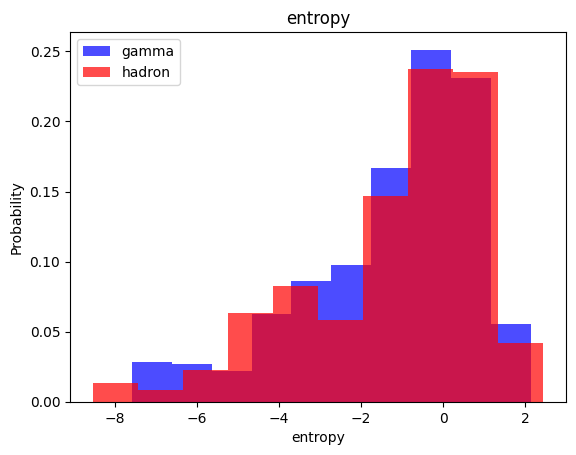

In [4]:
for label in labels[:-1]:
    plt.hist(trainingdata[trainingdata["class"] == 1][label],
             color='blue', label="gamma", alpha=0.7, density=True)
    plt.hist(trainingdata[trainingdata["class"] == 0][label],
             color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()



In [5]:
#separate the column and the row
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scalar = StandardScaler()
    # take x and fit the scalar transform all the values
    X = scalar.fit_transform(X)
    # if one dataset is way much higher than the other one this will make the model to prefer the data with higher number of class
    # so we make the data equal
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    return  X, Y


print("before oversampleing no of gammas is ",
      len(trainingdata[trainingdata["class"] == 1]))  # 7455
print("before oversampleing no of hadron is ",
      len(trainingdata[trainingdata["class"] == 0]))  # 3957


#if the class have different number of training set we use oversampling 
#to normalize so the network wont tilt to one class 
xtrain, ytrain = scale_dataset(trainingdata , oversample=True)


print("after oversampleing no of gammas is ",
      len(ytrain[ytrain == 1]))  # 7455
print("before oversampleing no of hadron is ",
      len(ytrain[ytrain == 0]))  # 3957



before oversampleing no of gammas is  610
before oversampleing no of hadron is  762
after oversampleing no of gammas is  762
before oversampleing no of hadron is  762


In [6]:
from sklearn.model_selection import train_test_split
#train split test the data 

Xtrain,  Xtest, Ytrain, Ytest = train_test_split(xtrain, ytrain,  random_state=104,
                                                test_size=0.25,
                                                shuffle=True)



In [7]:
#training the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(Xtrain, Ytrain)
# Predict the response for test dataset

# Predict the response for test dataset
y_pred = decision_tree_model.predict(Xtest)


In [8]:
print(classification_report(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.99      0.98      0.99       186

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381

[[193   2]
 [  3 183]]


In [ ]:
#greedy search here